In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix price in different countries.csv')

In [3]:
df.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [4]:
df.shape

(65, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [6]:
df.columns

Index(['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies',
       'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Premium ($)'],
      dtype='object')

<AxesSubplot:>

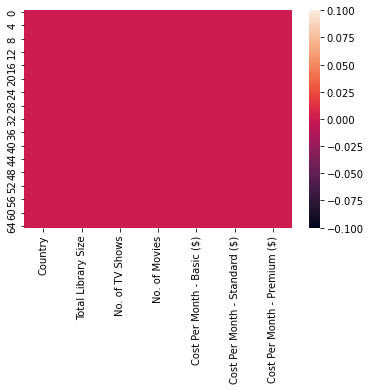

In [7]:
sns.heatmap(df.isna())

<AxesSubplot:>

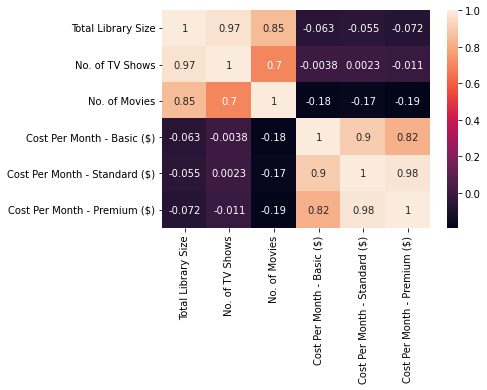

In [8]:
corr = df.corr()
sns.heatmap(corr,annot = True)

<AxesSubplot:xlabel='Country'>

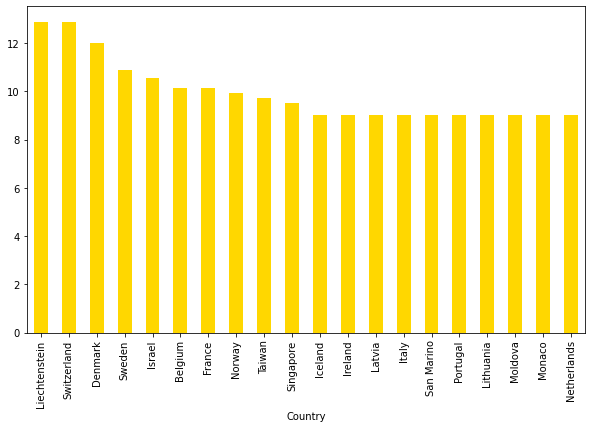

In [9]:
#top 20 costliest countries with Basic cost

plt.figure(figsize = (10,6))
top20basic = df.groupby('Country')['Cost Per Month - Basic ($)'].sum().sort_values(ascending=False)
top20basic[:20].plot(kind = 'bar', color ='gold')

In [10]:
bottomStandard = top20basic[50:65]

<AxesSubplot:xlabel='Country'>

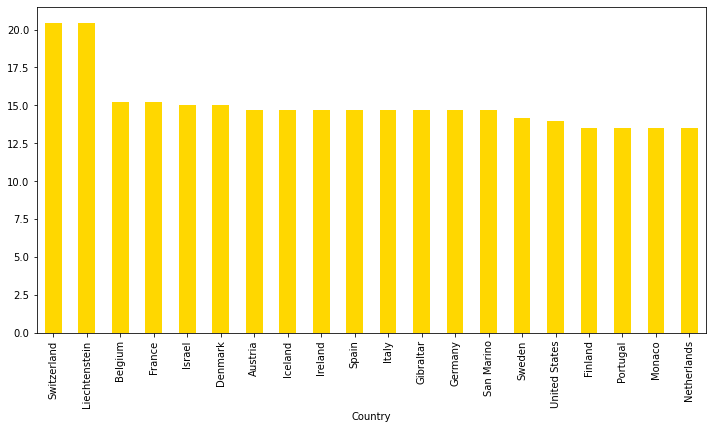

In [11]:
#top 20 costliest countries with Standard cost
plt.figure(figsize =(12,6))
top20Standard = df.groupby('Country')['Cost Per Month - Standard ($)'].sum().sort_values(ascending = False)
top20Standard[:20].plot(kind ='bar', color ='gold')

In [12]:
bottomSandard = top20Standard[50:65]

<AxesSubplot:xlabel='Country'>

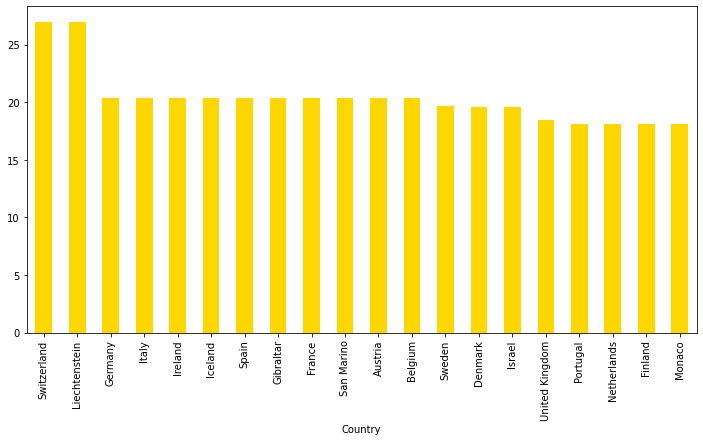

In [13]:
#top 20 costliest countries with Premium cost
plt.figure(figsize =(12,6))
top20Premium = (df.groupby('Country')['Cost Per Month - Premium ($)'].sum().sort_values(ascending = False))
top20Premium[:20].plot(kind ='bar', color ='gold')

In [14]:
bottomPremium = top20Premium[50:65]

In [15]:
# Percentage of countrties above Mean
basicMean = df['Cost Per Month - Basic ($)'].mean()
standardMean = df['Cost Per Month - Standard ($)'].mean()
premiumMean = df['Cost Per Month - Premium ($)'].mean()

In [16]:
a= (df[df['Cost Per Month - Basic ($)']>basicMean].shape[0]/df.shape[0])*100
b =(df[df['Cost Per Month - Standard ($)']>standardMean].shape[0]/df.shape[0])*100
c= (df[df['Cost Per Month - Premium ($)']>premiumMean].shape[0]/df.shape[0])*100

([<matplotlib.patches.Wedge at 0x7fe56ed3f4f0>,
 [Text(0.3743224195084359, 1.034351355320498, 'Basic'),
  Text(-1.1582506447098084, -0.31377610493680574, 'Standard'),
  Text(0.6317616869209914, -0.9004871853273334, 'Premium')],
 [Text(0.20417586518641956, 0.5641916483566352, '38.9%'),
  Text(-0.6756462094140548, -0.18303606121313665, '30.5%'),
  Text(0.3445972837750862, -0.49117482836036364, '30.5%')])

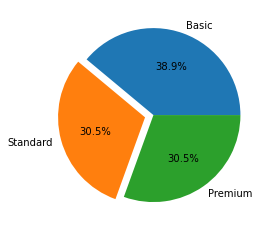

In [17]:
labels = ['Basic', 'Standard', 'Premium']
x = [a,b,c]
explode=(0,0.1,0)
plt.pie(x,explode=explode,labels=labels,autopct='%1.1f%%',normalize=True)

Text(0, 0.5, 'Cost Per Month')

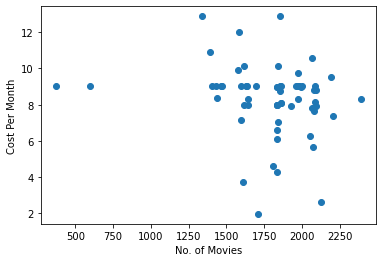

In [18]:
# Relation between Number of tv shows and Subscription Free
plt.scatter(x = df['No. of Movies'], y = df['Cost Per Month - Basic ($)'])
plt.xlabel('No. of Movies')
plt.ylabel('Cost Per Month')

Text(0, 0.5, 'Cost Per Month')

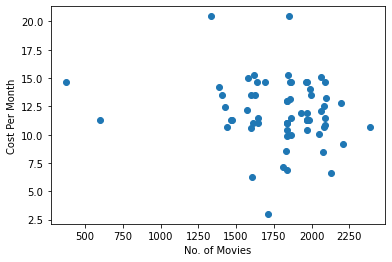

In [19]:
plt.scatter(x = df['No. of Movies'], y = df['Cost Per Month - Standard ($)'])
plt.xlabel('No. of Movies')
plt.ylabel('Cost Per Month')

Text(0, 0.5, 'Cost Per Month')

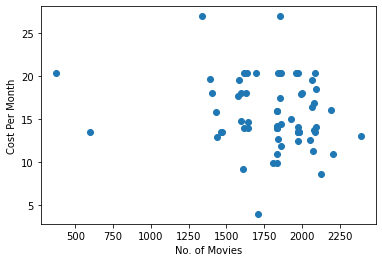

In [20]:
plt.scatter(x = df['No. of Movies'], y = df['Cost Per Month - Premium ($)'])
plt.xlabel('No. of Movies')
plt.ylabel('Cost Per Month')

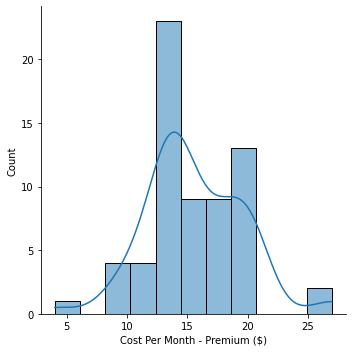

In [21]:
# Distribution of Cost features
sns.displot(df['Cost Per Month - Premium ($)'],kde = True)

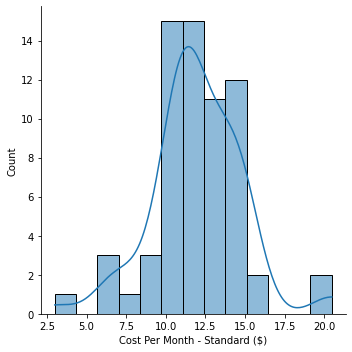

In [22]:
sns.displot(df['Cost Per Month - Standard ($)'],kde = True)

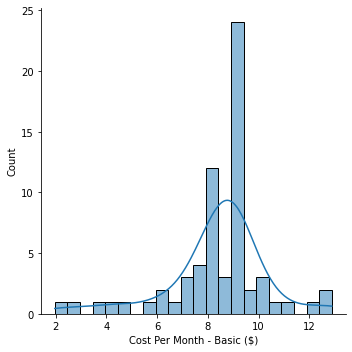

In [23]:
sns.displot(df['Cost Per Month - Basic ($)'],kde = True)

/home/frank/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost Per Month - Premium ($)'>

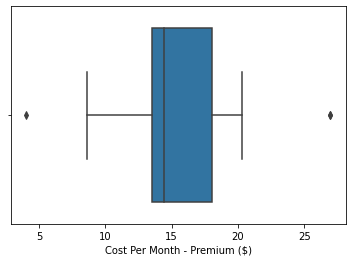

In [24]:
# Subscrition Fee range
sns.boxplot(df['Cost Per Month - Premium ($)'])

/home/frank/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost Per Month - Standard ($)'>

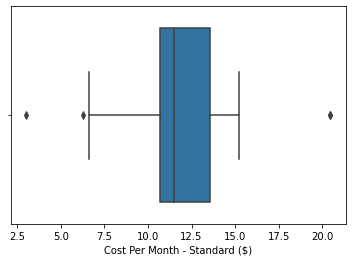

In [25]:
sns.boxplot(df['Cost Per Month - Standard ($)'])

/home/frank/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost Per Month - Basic ($)'>

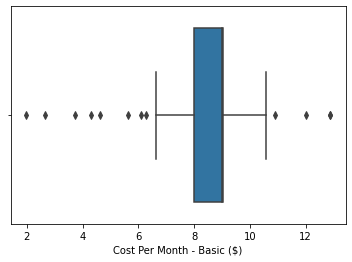

In [26]:
sns.boxplot(df['Cost Per Month - Basic ($)'])

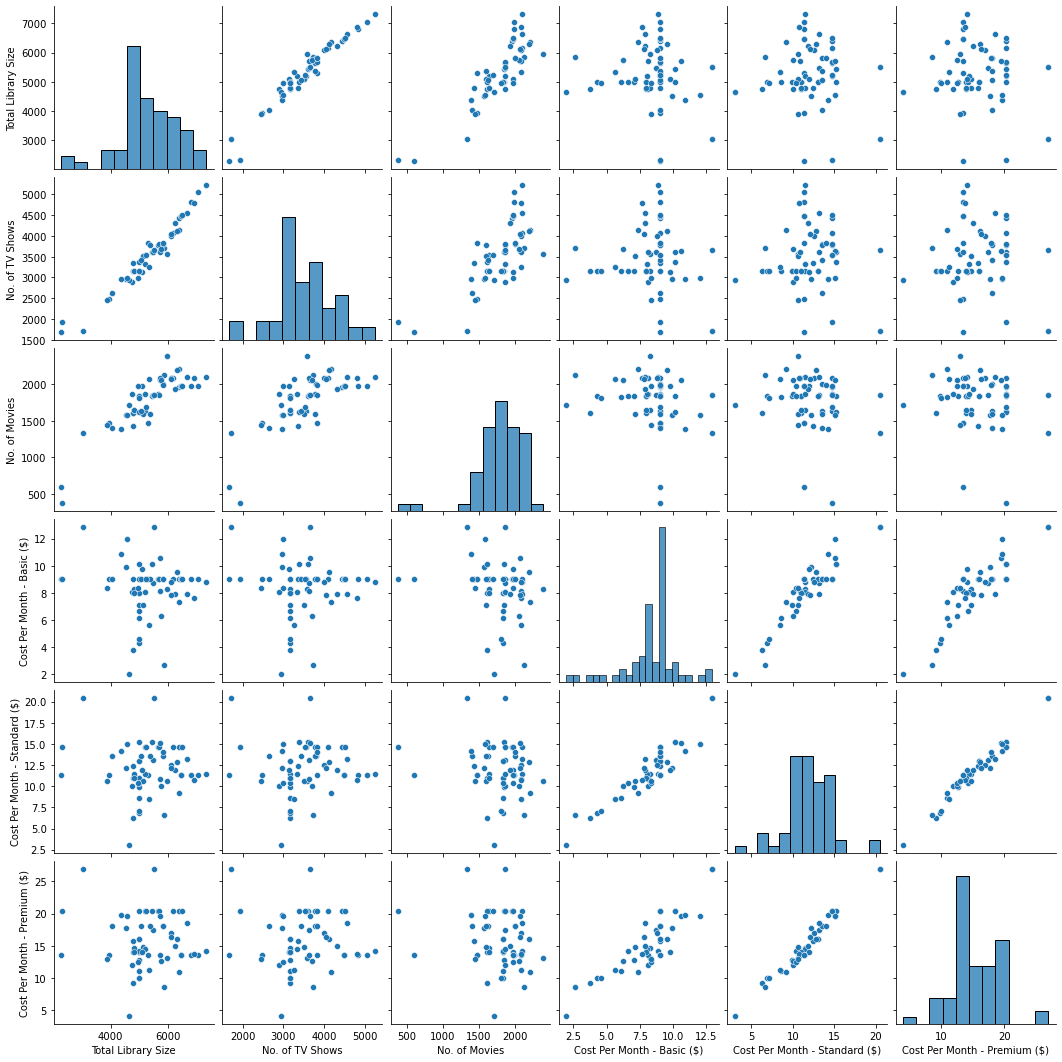

In [27]:
sns.pairplot(df)

In [42]:
# Most expensive countries
df2 = pd.concat([top20Premium[:20], top20Standard[:20], top20basic[:20]], axis = 1)

In [45]:
df2.head()

,Cost Per Month - Premium ($),Cost Per Month - Standard ($),Cost Per Month - Basic ($)
Country,,,
Switzerland,26.96,20.46,12.88
Liechtenstein,26.96,20.46,12.88
Germany,20.32,14.67,NaN
Italy,20.32,14.67,9.03
Ireland,20.32,14.67,9.03


In [52]:
df2.shape(0)

TypeError: 'tuple' object is not callable

In [53]:
df2

,Cost Per Month - Premium ($),Cost Per Month - Standard ($),Cost Per Month - Basic ($)
Country,,,
Switzerland,26.96,20.46,12.88
Liechtenstein,26.96,20.46,12.88
Germany,20.32,14.67,NaN
Italy,20.32,14.67,9.03
Ireland,20.32,14.67,9.03
Iceland,20.32,14.67,9.03
Spain,20.32,14.67,NaN
Gibraltar,20.32,14.67,NaN
France,20.32,15.24,10.16


In [55]:
df2.rename(columns={'':'Country'},inplace = True)


In [56]:
df3= df2.dropna()

In [57]:
df3

,Cost Per Month - Premium ($),Cost Per Month - Standard ($),Cost Per Month - Basic ($)
Country,,,
Switzerland,26.96,20.46,12.88
Liechtenstein,26.96,20.46,12.88
Italy,20.32,14.67,9.03
Ireland,20.32,14.67,9.03
Iceland,20.32,14.67,9.03
France,20.32,15.24,10.16
San Marino,20.32,14.67,9.03
Belgium,20.32,15.24,10.16
Sweden,19.70,14.20,10.90


In [58]:
df3.head()

,Cost Per Month - Premium ($),Cost Per Month - Standard ($),Cost Per Month - Basic ($)
Country,,,
Switzerland,26.96,20.46,12.88
Liechtenstein,26.96,20.46,12.88
Italy,20.32,14.67,9.03
Ireland,20.32,14.67,9.03
Iceland,20.32,14.67,9.03


In [59]:
df3.columns

Index(['Cost Per Month - Premium ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Basic ($)'],
      dtype='object')

In [60]:
df3.reset_index(inplace=True)

In [61]:
df3

,Country,Cost Per Month - Premium ($),Cost Per Month - Standard ($),Cost Per Month - Basic ($)
0,Switzerland,26.96,20.46,12.88
1,Liechtenstein,26.96,20.46,12.88
2,Italy,20.32,14.67,9.03
3,Ireland,20.32,14.67,9.03
4,Iceland,20.32,14.67,9.03
5,France,20.32,15.24,10.16
6,San Marino,20.32,14.67,9.03
7,Belgium,20.32,15.24,10.16
8,Sweden,19.70,14.20,10.90
9,Denmark,19.60,15.04,12.00


In [62]:
df3.columns

Index(['Country', 'Cost Per Month - Premium ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Basic ($)'],
      dtype='object')

<Figure size 864x864 with 0 Axes>

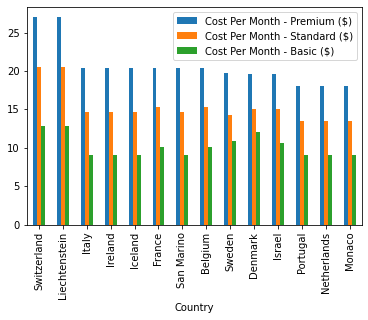

In [63]:
plt.figure(figsize=(12,12))
df3.plot(x="Country", y=["Cost Per Month - Premium ($)", "Cost Per Month - Standard ($)",'Cost Per Month - Basic ($)'],kind='bar')
plt.show()

In [64]:
#Costliest countries are mostly European countries - Switzerland,Liechtenstein,Italy,Ireland,etc.